In [1]:
# เรียกใช้ library สำหรับทำงานประกอบด้วย numpy pandas seaborn เเละ matplotlib
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
# อ่านข้อมูลไฟล์ csv จาก https://raw.githubusercontent.com/nawinpoyen7/MachineLearning/main/DataSet/DataChange.csv
# และเเสดง 5 ตัวอย่างเเรก เพื่อตรวจสอบข้อมูล
url='https://raw.githubusercontent.com/nawinpoyen7/MachineLearning/main/DataSet/CombDataSet.csv'
df=pd.read_csv(url)
df.head(5)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0.015047,0.000000,0.005260,0.000000,0.003284,0.002718,0.000000,0.012819,0.007649,D
1,0.000000,0.014676,0.009085,0.014188,0.009852,0.002718,0.012093,0.009614,0.007649,A
2,0.000000,0.014676,0.016018,0.014188,0.009852,0.002718,0.000000,0.003205,0.012749,B
3,0.015047,0.014676,0.016018,0.014188,0.016421,0.000000,0.024186,0.006410,0.012749,B
4,0.000000,0.014676,0.009563,0.014188,0.006568,0.002718,0.024186,0.019229,0.012749,A


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   float64
 1   Ever_Married     8068 non-null   float64
 2   Age              8068 non-null   float64
 3   Graduated        8068 non-null   float64
 4   Profession       8068 non-null   float64
 5   Work_Experience  8068 non-null   float64
 6   Spending_Score   8068 non-null   float64
 7   Family_Size      8068 non-null   float64
 8   Var_1            8068 non-null   float64
 9   Segmentation     8068 non-null   object 
dtypes: float64(9), object(1)
memory usage: 630.4+ KB


In [4]:
df.Segmentation.value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [5]:
df.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [6]:
df.groupby('Segmentation').mean()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
Segmentation,,,,,,,,,
A,0.008111,0.008462,0.010740,0.008770,0.008813,0.007312,0.005427,0.008522,0.010385
B,0.008074,0.010647,0.011523,0.010171,0.007654,0.006077,0.008839,0.008962,0.010582
C,0.008004,0.011539,0.011749,0.011573,0.005895,0.005825,0.010515,0.009821,0.011171
D,0.008684,0.003941,0.007983,0.005067,0.009068,0.007516,0.002399,0.011174,0.010045


In [7]:
df.groupby('Segmentation').max()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
Segmentation,,,,,,,,,
A,0.015047,0.014676,0.021277,0.014188,0.026273,0.038054,0.024186,0.028843,0.015299
B,0.015047,0.014676,0.021277,0.014188,0.026273,0.038054,0.024186,0.028843,0.015299
C,0.015047,0.014676,0.021277,0.014188,0.026273,0.038054,0.024186,0.028843,0.015299
D,0.015047,0.014676,0.021277,0.014188,0.026273,0.038054,0.024186,0.028843,0.015299


In [8]:
df.groupby('Segmentation').min()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
Segmentation,,,,,,,,,
A,0.0,0.0,0.004303,0.0,0.0,0.0,0.0,0.003205,0.0
B,0.0,0.0,0.004303,0.0,0.0,0.0,0.0,0.003205,0.0
C,0.0,0.0,0.004303,0.0,0.0,0.0,0.0,0.003205,0.0
D,0.0,0.0,0.004303,0.0,0.0,0.0,0.0,0.003205,0.0


In [9]:
Vals=['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size','Var_1']

In [10]:
#sns.pairplot(data=df,hue='Segmentation');

In [11]:
# ในตัวอย่างนี้เลือกพิจารณาเพียง 4 หัวข้อ (Age) (Work_Experience)(Spending_Score)(Family_Size)
#value=['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Spending_Score', 'Family_Size']
# สร้างตัวเเปร ชื่อ value เพื่อเก็บตัวเเปรที่สนใน ได้เเก่ 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Spending_Score', 'Family_Size'
# sns.pairplot(data=df,hue='Segmentation');

In [12]:
# จัดกลุ่มข้อมูล (Classification) ด้วยวิธี K-Nearest Neighbours โดยใช้ library ของ scikit learn
# นำเข้าคลาสของ KNeighborsClassifier StandardScaler เเละ train_test_split จาก scikit learn โดย
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler # ปรับช่วงข้อมูลด้วยวิธี standardization

In [13]:
# เเสดงหัวข้อในเเต่ละคอลัมน์ของฐานข้อมูล
df.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [14]:
# แบ่งชุดข้อมูลออกเป็นชุดฝึกฝนเเละชุดทดสอบ
test_size=0.25 
x_train, x_test, y_train, y_test = train_test_split(
    df[['Age', 'Spending_Score', 'Profession', 'Gender', 'Var_1']], 
    df.Segmentation, 
    test_size=test_size, random_state=7)

In [15]:
y_train.head()

6349    B
7275    D
1690    B
1328    C
7616    D
Name: Segmentation, dtype: object

In [16]:
x_train.head()

,Age,Spending_Score,Profession,Gender,Var_1
6349,0.014344,0.0,0.000000,0.015047,0.012749
7275,0.004781,0.0,0.003284,0.015047,0.012749
1690,0.009324,0.0,0.000000,0.000000,0.012749
1328,0.009563,0.0,0.000000,0.000000,0.012749
7616,0.005260,0.0,0.003284,0.015047,0.012749


In [17]:
# สร้างแบบจำลอง K-Nearest Neighbours ด้วยคลาส KNeighborsClassifier ใน Sklearn
prefer_k = 37  # สร้างตัวเเปรสำหรับเก็บ k ที่ต้องการ
model = KNeighborsClassifier(n_neighbors=prefer_k)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=37, p=2,
                     weights='uniform')

In [18]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=37, p=2,
                     weights='uniform')

In [19]:
# ทดลองดูค่าผิดพลาดของแบบจำลองที่สร้างขึ้นโดยใช้ค่า  R2
model.score(x_train, y_train)

0.5375970913898529

In [20]:
model.score(x_test, y_test)

0.5141298958849777

In [21]:
# ทดลองทดสอบประสิทธิภาพแบบจำลองด้วย cross validation
from sklearn.model_selection import cross_val_score 

In [22]:
scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
scores

array([0.49793559, 0.49586777, 0.50909091, 0.47190083, 0.52231405])

In [23]:
# เเสดงค่าเฉลี่ยเเละค่าเบี่ยงเบนมาตรฐานของประสิทธิภาพ
from numpy import mean, std
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.499 (0.017)


In [24]:
# ทดลองเเสดงค่าผลทำนายจากชุดข้อมูลทดสอบ
predicted = model.predict(x_test)

In [25]:
from sklearn import metrics
print(metrics.classification_report(y_test,predicted,target_names=df.Segmentation.unique(), digits=3))

              precision    recall  f1-score   support

           D      0.446     0.462     0.454       494
           A      0.391     0.322     0.353       491
           B      0.532     0.511     0.521       491
           C      0.635     0.739     0.683       541

    accuracy                          0.514      2017
   macro avg      0.501     0.508     0.503      2017
weighted avg      0.504     0.514     0.507      2017



In [26]:
# กำหนดช่วงค่า K ที่ต้องการทดสอบให้เท่ากับ 1 ถึง 100
k_list = list(range(1,100+1))
k_values = dict(n_neighbors=k_list)

In [27]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, k_values, cv=5, scoring='accuracy')

In [28]:
# เเสดงหัวข้อในเเต่ละคอลัมน์ของฐานข้อมูล
df.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [31]:
# เรียนรู้แบบจำลอง
grid.fit(df[['Age', 'Spending_Score', 'Profession', 'Gender', 'Var_1']], df.Segmentation)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=37, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [32]:
# แสดงค่าประสิทธิภาพที่ได้
grid.cv_results_
grid_table = pd.DataFrame(grid.cv_results_)
grid_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.194211,0.056718,0.869250,0.205080,1,{'n_neighbors': 1},0.423172,0.415118,0.436183,0.454433,0.417235,0.429228,0.014583,99
1,0.237414,0.090616,0.976456,0.152088,2,{'n_neighbors': 2},0.412020,0.388476,0.411400,0.422195,0.407316,0.408281,0.011050,100
2,0.199411,0.049064,0.833448,0.042531,3,{'n_neighbors': 3},0.455390,0.438042,0.460967,0.454433,0.454433,0.452653,0.007700,98
3,0.263415,0.066338,0.877450,0.113644,4,{'n_neighbors': 4},0.460347,0.451673,0.458488,0.477991,0.468072,0.463314,0.009007,97
4,0.195811,0.033465,0.795246,0.058837,5,{'n_neighbors': 5},0.462206,0.458488,0.470260,0.482331,0.478611,0.470379,0.009152,96


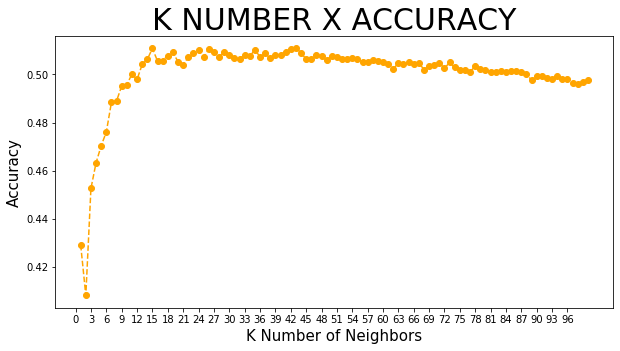

In [33]:
# ทดลองพล็อตกราฟค่าประสิทธิภาพ
graphic = grid.cv_results_['mean_test_score']
graphic

plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='orange',linestyle='dashed',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Accuracy', fontdict={'fontsize': 15})
plt.title('K NUMBER X ACCURACY', fontdict={'fontsize': 30})
plt.xticks(range(0,99,3),)
plt.show()

In [34]:
# เเสดงค่า k ที่ให้ประสิทธิภาพสูงสุด
print("The best value of k = {} with {} of accuracy.".format(grid.best_params_,grid.best_score_))

The best value of k = {'n_neighbors': 15} with 0.510785432180141 of accuracy.


In [39]:
prefer_k = 15  # สร้างตัวเเปรสำหรับเก็บ k ที่ต้องการ
model = KNeighborsClassifier(n_neighbors=prefer_k)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [40]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [41]:
model.score(x_train, y_train)

0.5665179309205091

In [42]:
model.score(x_test, y_test)

0.5037183936539414